# 无监督学习之聚类算法

author: Kujou Kazuya

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

## 1 数据集介绍

Iris 数据集的中文名是安德森鸢尾花卉数据集，英文全称是Anderson’s Iris data set。Iris 包含150个样本，对应数据集的每行数据。每行数据包含每个样本的四个特征和样本的类别信息。Iris 数据集是用来给花做分类的数据集，每个样本包含了花萼长度、花萼宽度、花瓣长度、花瓣宽度四个特征。


In [2]:
# Load the iris dataset
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

In [3]:
iris_features = pd.DataFrame(data=iris.data, columns=iris.feature_names)  # 转化为 DataFrame 格式
# 利用.info()查看数据的整体信息
iris_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
# 进行简单的数据查看，我们可以利用 .head() 头部
print(iris_features.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


## 2 使用 K-Means 进行聚类

K-Means算法是一种基于距离的聚类算法，它将数据点分为k个簇，每个簇的中心点是该簇中所有数据点的平均值。K-Means算法对于凸性数据具有良好的效果，能够根据距离将数据分为球状类的簇。

### 2.1 确定聚簇数

肘方法是一种常用的确定KMeans聚类的最佳簇数的方法。该方法的基本思想是：随着簇数的增加，样本划分会更加精细，每个簇的聚合程度会逐渐提高，那么误差平方和（SSE）自然会逐渐变小。并且，当簇数等于样本个数时，SSE最小为0。因此，随着簇数的增加，SSE的下降幅度会逐渐变小，而当某个簇数对应的SSE下降幅度较小时，这个簇数对应的K值就是数据的最优簇数。

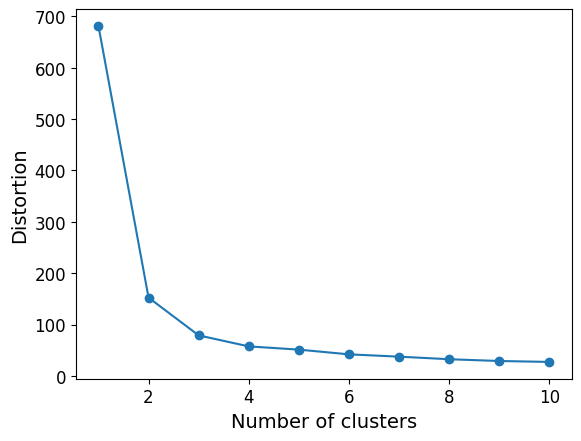

In [5]:
from sklearn.cluster import KMeans


# Find the optimal number of clusters using the elbow method
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
plt.plot(range(1, 11), distortions, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

由上图可知，3对应的SSE下降幅度较小时，因此3就是数据的最优簇数。

### 2.2 训练模型

使用Scikit-learn库中的`KMeans`类进行聚类，设置簇数为3。

In [6]:
# Perform K-means clustering with K=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


### 2.3 模型预测

使用3个编造的数据来测试模型的性能。

In [7]:
import numpy as np

# Predict new data using the trained model
new_data = np.array([[5.1, 3.5, 1.4, 0.2], [6.2, 2.8, 4.8, 1.8], [6.8, 3.2, 5.9, 2.3]])
labels = kmeans.predict(new_data)
print(labels)

[1 2 0]


上面代码的执行结果表明，样本点[5.1, 3.5, 1.4, 0.2], [6.2, 2.8, 4.8, 1.8], [6.8, 3.2, 5.9, 2.3]分别属于聚族1，聚族0和聚族2。


### 2.4 绘制质心

`KMeans`对象的`cluster_centers_`属性可以输出3个聚类的质心。

In [8]:
# Output the centroids
centroids = kmeans.cluster_centers_
print(centroids)

[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


### 2.5 模型可视化

为了更方便的观察新样本、质心的几何特征，我们使用`matplotlib`将其可视化。

#### 2.5.1 选取两个特性来进行二维可视化

选取花萼长度和宽度进行可视化。样本数据采用点来标记，cmap=“viridis"表示使用viridis颜色映射。新样本使用三角形标记，质心使用星号标记。

/tmp/ipykernel_3823610/1109557797.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


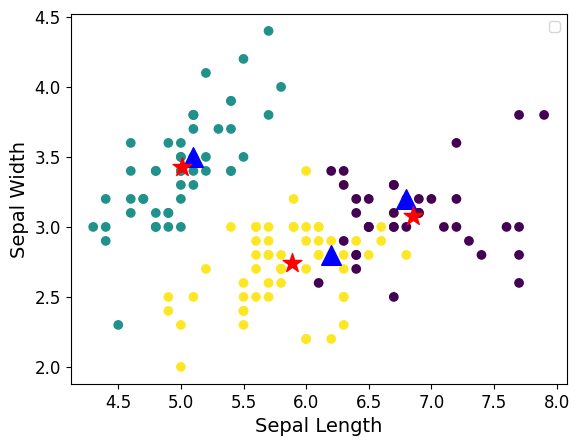

In [9]:
# Visualize the clustering results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap="viridis")
plt.scatter(new_data[:, 0], new_data[:, 1], marker="^", s=200, c="b")
plt.scatter(centroids[:, 0], centroids[:, 1], marker="*", s=200, c="r")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

#### 2.5.2 选取三个特征进行三维可视化

选取花萼长度、宽度和花瓣长度进行可视化。样本数据采用点来标记，cmap=“viridis"表示使用viridis颜色映射。新样本使用三角形标记，质心使用星号标记。

Text(0.5, 0.92, 'KMeans-3D Clustering')

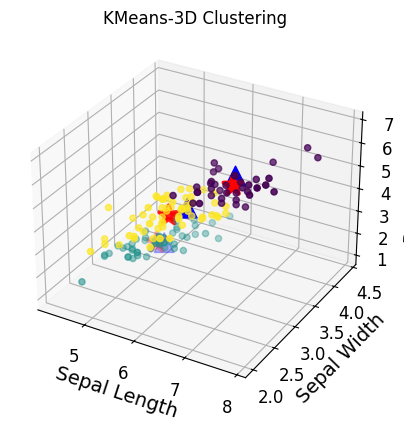

In [10]:
# Visualize data in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans.labels_, cmap="viridis")
ax.scatter(new_data[:, 0], new_data[:, 1], new_data[:, 2], marker="^", s=200, c="b")
ax.scatter(
    centroids[:, 0],
    centroids[:, 1],
    centroids[:, 2],
    marker="*",
    s=200,
    linewidths=3,
    color="r",
)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.set_title("KMeans-3D Clustering")

#### 2.5.3 降维后进行二维可视化

选取花萼长度、宽度和花瓣长度进行可视化。样本数据采用点来标记，cmap="viridis"表示使用viridis颜色映射。新样本使用三角形标记，质心使用星号标记。

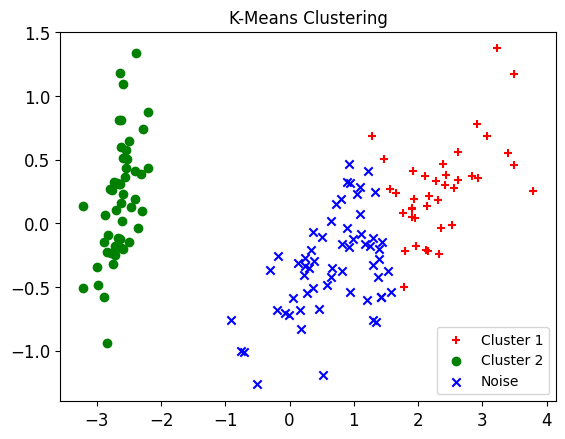

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c="r", marker="+")
    elif kmeans.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c="g", marker="o")
    elif kmeans.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c="b", marker="x")

plt.legend([c1, c2, c3], ["Cluster 1", "Cluster 2", "Noise"])
plt.title("K-Means Clustering")
plt.show()

## 3 使用 DBSCAN 进行聚类

对于非凸形状的数据点，K-Means就无能为力了。DBSCAN算法是一种基于密度的算法，它可以发现任意形状的聚类，这对于带有噪音点的数据起着重要的作用。和传统的K-Means算法相比，DBSCAN最大的不同就是不需要输入类别数k，当然它最大的优势是可以发现任意形状的聚类簇，而不是像K-Means，一般仅仅使用于凸的样本集聚类。

### 3.1 训练模型

使用Scikit-learn库中的`DBSCAN`类进行聚类，设置半径为0.5，半径内最少的样本量为3。

In [12]:
# Fitting the data using DBSCAN

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan.fit(X)

,eps,0.5
,min_samples,3
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


### 3.2 模型预测

使用`labels_`查看DBSCAN对样本集的聚类结果。

In [13]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  3, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  3,
        1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

输出的正数表示聚族号，-1表示异常样本。

### 3.3 模型可视化

为了更方便的观察样本的分布几何特征，我们使用`matplotlib`将其可视化。

#### 3.3.1 选取两个特性来进行二维可视化

选取花萼长度和宽度进行可视化。样本数据采用点来标记，cmap=“viridis"表示使用viridis颜色映射。

/tmp/ipykernel_3823610/816224439.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


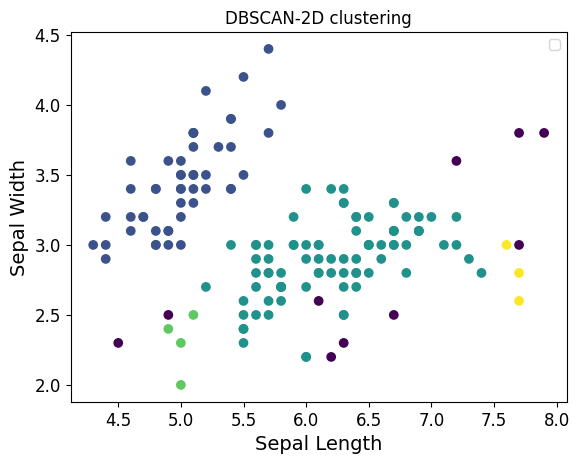

In [14]:
# Visualize the clustering results
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap="viridis")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("DBSCAN-2D clustering")
plt.legend()
plt.show()

#### 3.3.2 选取三个特征进行三维可视化

选取花萼长度、宽度和花瓣长度进行可视化。样本数据采用点来标记，cmap=“viridis"表示使用viridis颜色映射。

Text(0.5, 0.92, 'KMeans-3D Clustering')

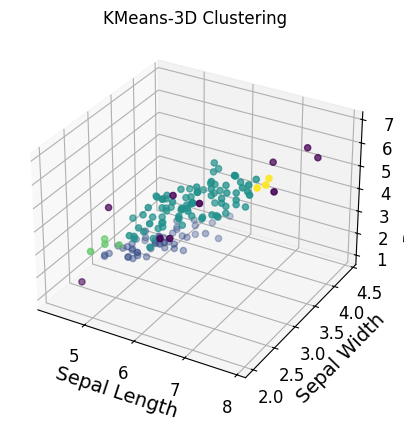

In [15]:
# Visualize data in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=dbscan.labels_, cmap="viridis")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.set_title("KMeans-3D Clustering")

#### 3.3.3 降维后进行二维可视化

选取花萼长度、宽度和花瓣长度进行可视化。样本数据采用点来标记，cmap="viridis"表示使用viridis颜色映射。

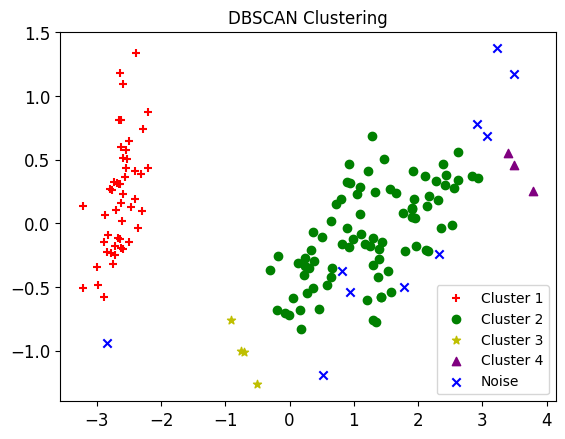

In [16]:
# Visualizing clusters
pca = PCA(n_components=3).fit(X)
pca_2d = pca.transform(X)

for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c="r", marker="+")
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c="g", marker="o")
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c="y", marker="*")
    elif dbscan.labels_[i] == 3:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c="purple", marker="^")
    elif dbscan.labels_[i] == -1:
        c5 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c="b", marker="x")

plt.legend([c1, c2, c3, c4, c5], ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Noise"])
plt.title("DBSCAN Clustering")
plt.show()